# EAA CA2
## Analysing a resource usage/load

### The system configuration:
* Motherboard: 2560 MB memory
* Processor: 1 CPU, execution cap: 100%
* Operating system: Linux Fedora 64bits (virtual machine)
* Memory: 1 disk, virtual size 19.25GB (actual size 11.74GB)

### The test:
The resource tested here is the processor, only 1 CPU is used for simplicity.

#### Importing libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
plt.style.use('ggplot')

#### Reading the data and converting to numbers

In [16]:
def numerical_converter(n):
    try:
        return int(n)
    except ValueError:
        return float(n)

with open('results.dat','r') as f:
    next(f)
    df = pd.DataFrame(map(numerical_converter, l.rstrip().split()) for l in f) # reading file

    df.columns = ['C0', 'N', 'idle'] # setting the header

In [17]:
df.head() # displaying five first rows

,C0,N,idle
0,50,1,78.62
1,88,2,78.91
2,123,3,73.72
3,152,4,68.69
4,180,5,63.40


## Ui vs N
Ui is the utilisation of resource, `Ui`

N is the number of concurrent users

Ui for a CPU is the amount of time not spent in idle task

The resource here is the CPU, each loadtest runs during 5 seconds and a summary is generated at 4 seconds, the busy time will be calculated with the formula `100 - idle`.

`Ui = (100 - idle)`

In [18]:
df['Ui'] = (100 - df['idle']) # calculating Ui

In [19]:
df.head() # displaying five first rows

,C0,N,idle,Ui
0,50,1,78.62,21.38
1,88,2,78.91,21.09
2,123,3,73.72,26.28
3,152,4,68.69,31.31
4,180,5,63.40,36.60


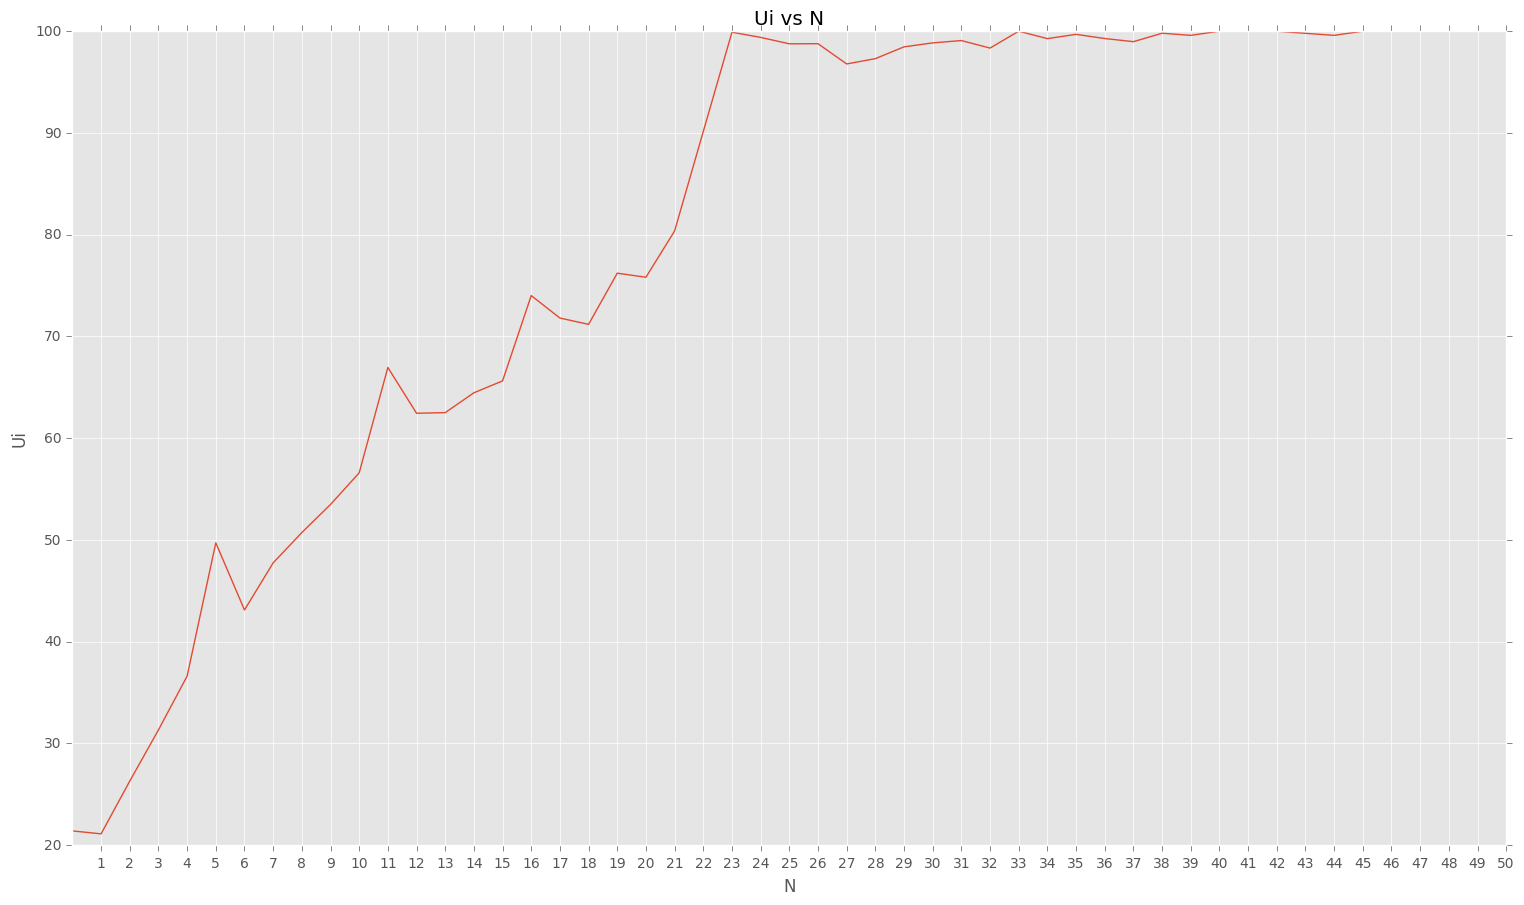

In [20]:
plt.plot(df['Ui'])
plt.xticks(df['N'])
plt.title("Ui vs N")
plt.xlabel("N")
plt.ylabel("Ui")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis
The CPU is getting saturated around 33 concurrent users where it reaches 95%, if this was a real system we could study other resources usage, is they saturate with less users we would have to upgrade these resources before, otherwise the CPU would be the priority.

## Di vs N
Di is the service demand, `Di = Vi * Si = Ui / X0`

N is the number of concurrent users

X0 is the throughput `X0 = C0/T = C0 / 4`

T is the length of time in the observation period (10 seconds)


`Di = Ui / (C0 / 10)`

In [29]:
df['Di'] = df['Ui']/(df['C0']/10)

In [30]:
df.head()

,C0,N,idle,Ui,Di,X0
0,50,1,78.62,21.38,4.276000,12.50
1,88,2,78.91,21.09,2.396591,22.00
2,123,3,73.72,26.28,2.136585,30.75
3,152,4,68.69,31.31,2.059868,38.00
4,180,5,63.40,36.60,2.033333,45.00


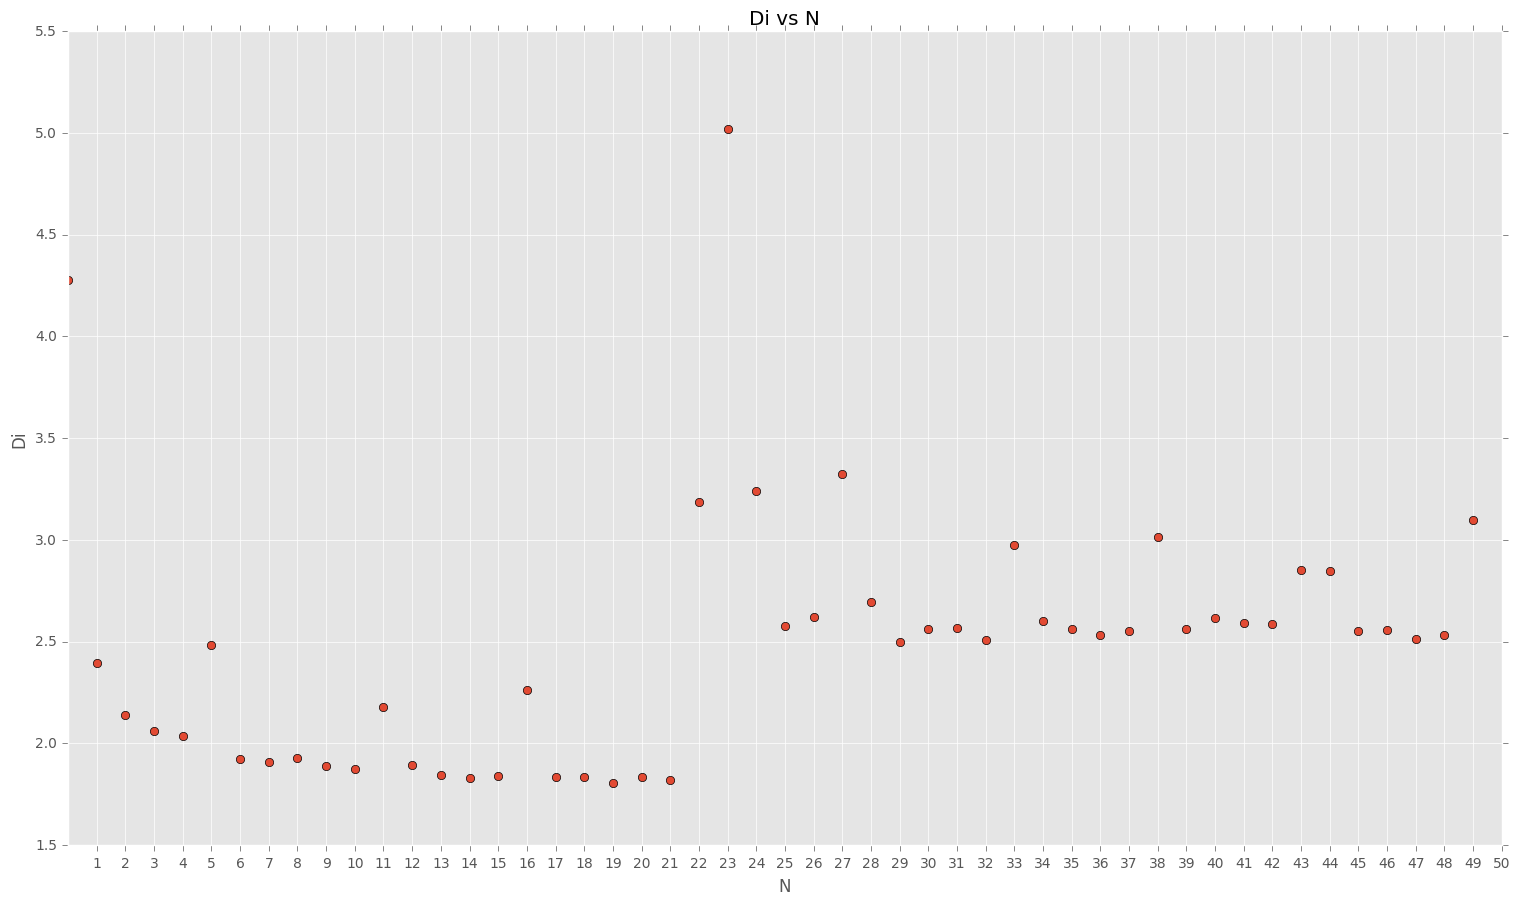

In [39]:
plt.plot(df['Di'],'o')
plt.xticks(df['N'])
plt.title("Di vs N")
plt.xlabel("N")
plt.ylabel("Di")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Analysis


## X0 vs N
X0 is the system throughput, `X0 = C0 / T`

T is the length of time in the observation period

In [33]:
df['X0'] = df['C0'] / 10

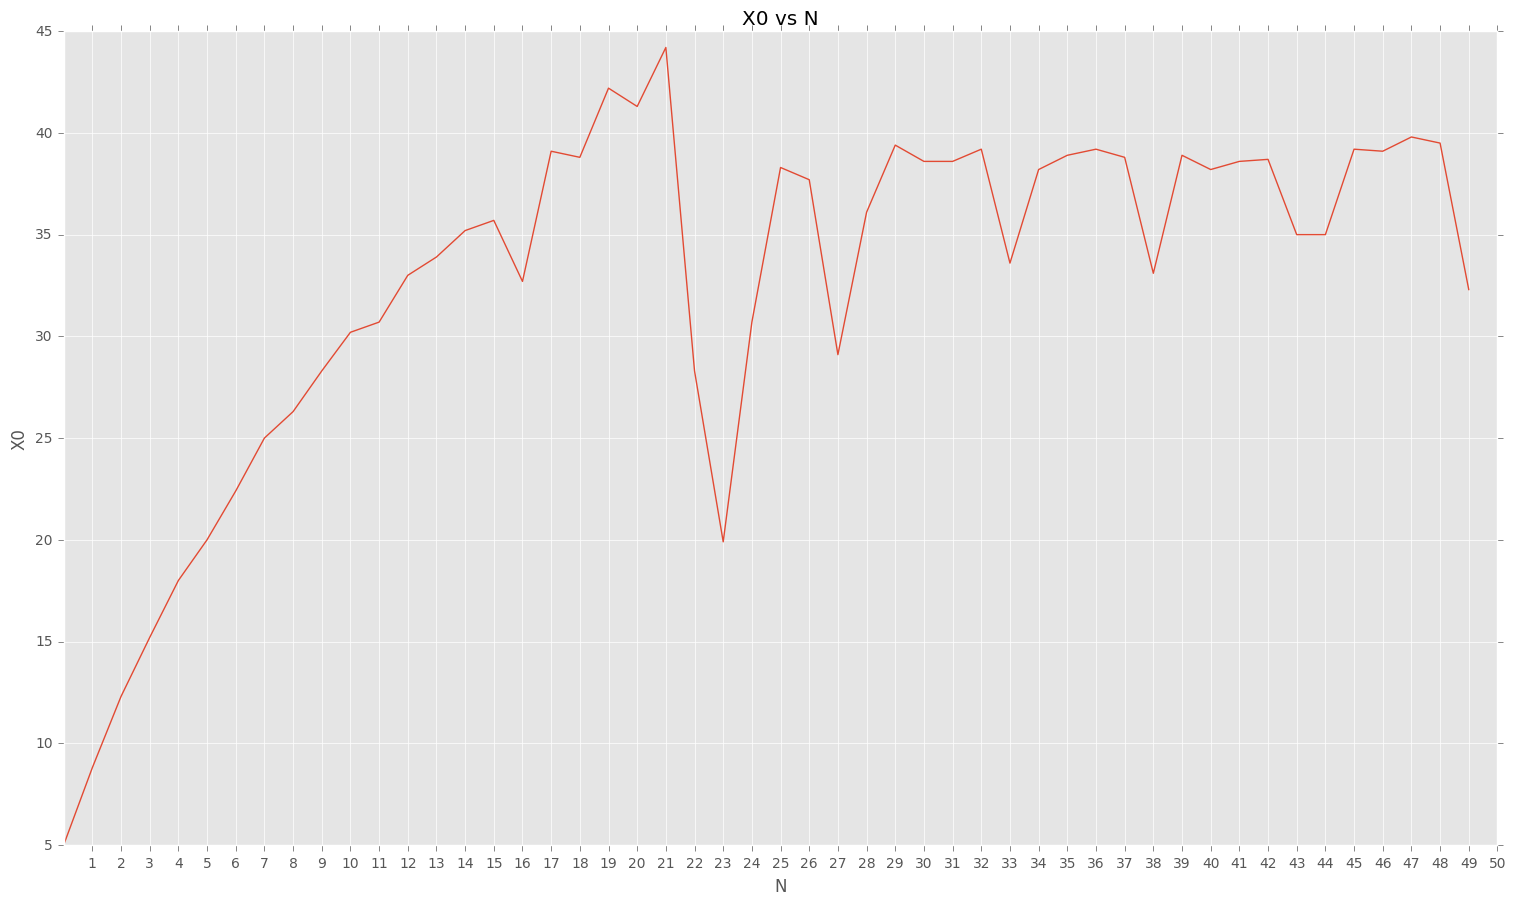

In [34]:
plt.plot(df['X0'])
plt.xticks(df['N'])
plt.title("X0 vs N")
plt.xlabel("N")
plt.ylabel("X0")

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## R vs N
R is the interactive response time, `R = (M / X0) - Z`

Z is the average think time

M is the number of concurrent users, here `M = N`

## Summary

In [35]:
summary = df.drop('N', 1).describe()[1:] # Strip off count as it will always be 50, Excluding N
summary

,C0,idle,Ui,Di,X0
mean,326.060000,20.37960,79.62040,2.484450,32.606000
std,90.003041,25.19955,25.19955,0.620161,9.000304
min,50.000000,0.00000,21.09000,1.805924,5.000000
25%,293.750000,0.33500,62.98750,1.925115,29.375000
50%,354.500000,2.18000,97.82000,2.532149,35.450000
75%,388.750000,37.01250,99.66500,2.613024,38.875000
max,442.000000,78.91000,100.00000,5.020101,44.200000


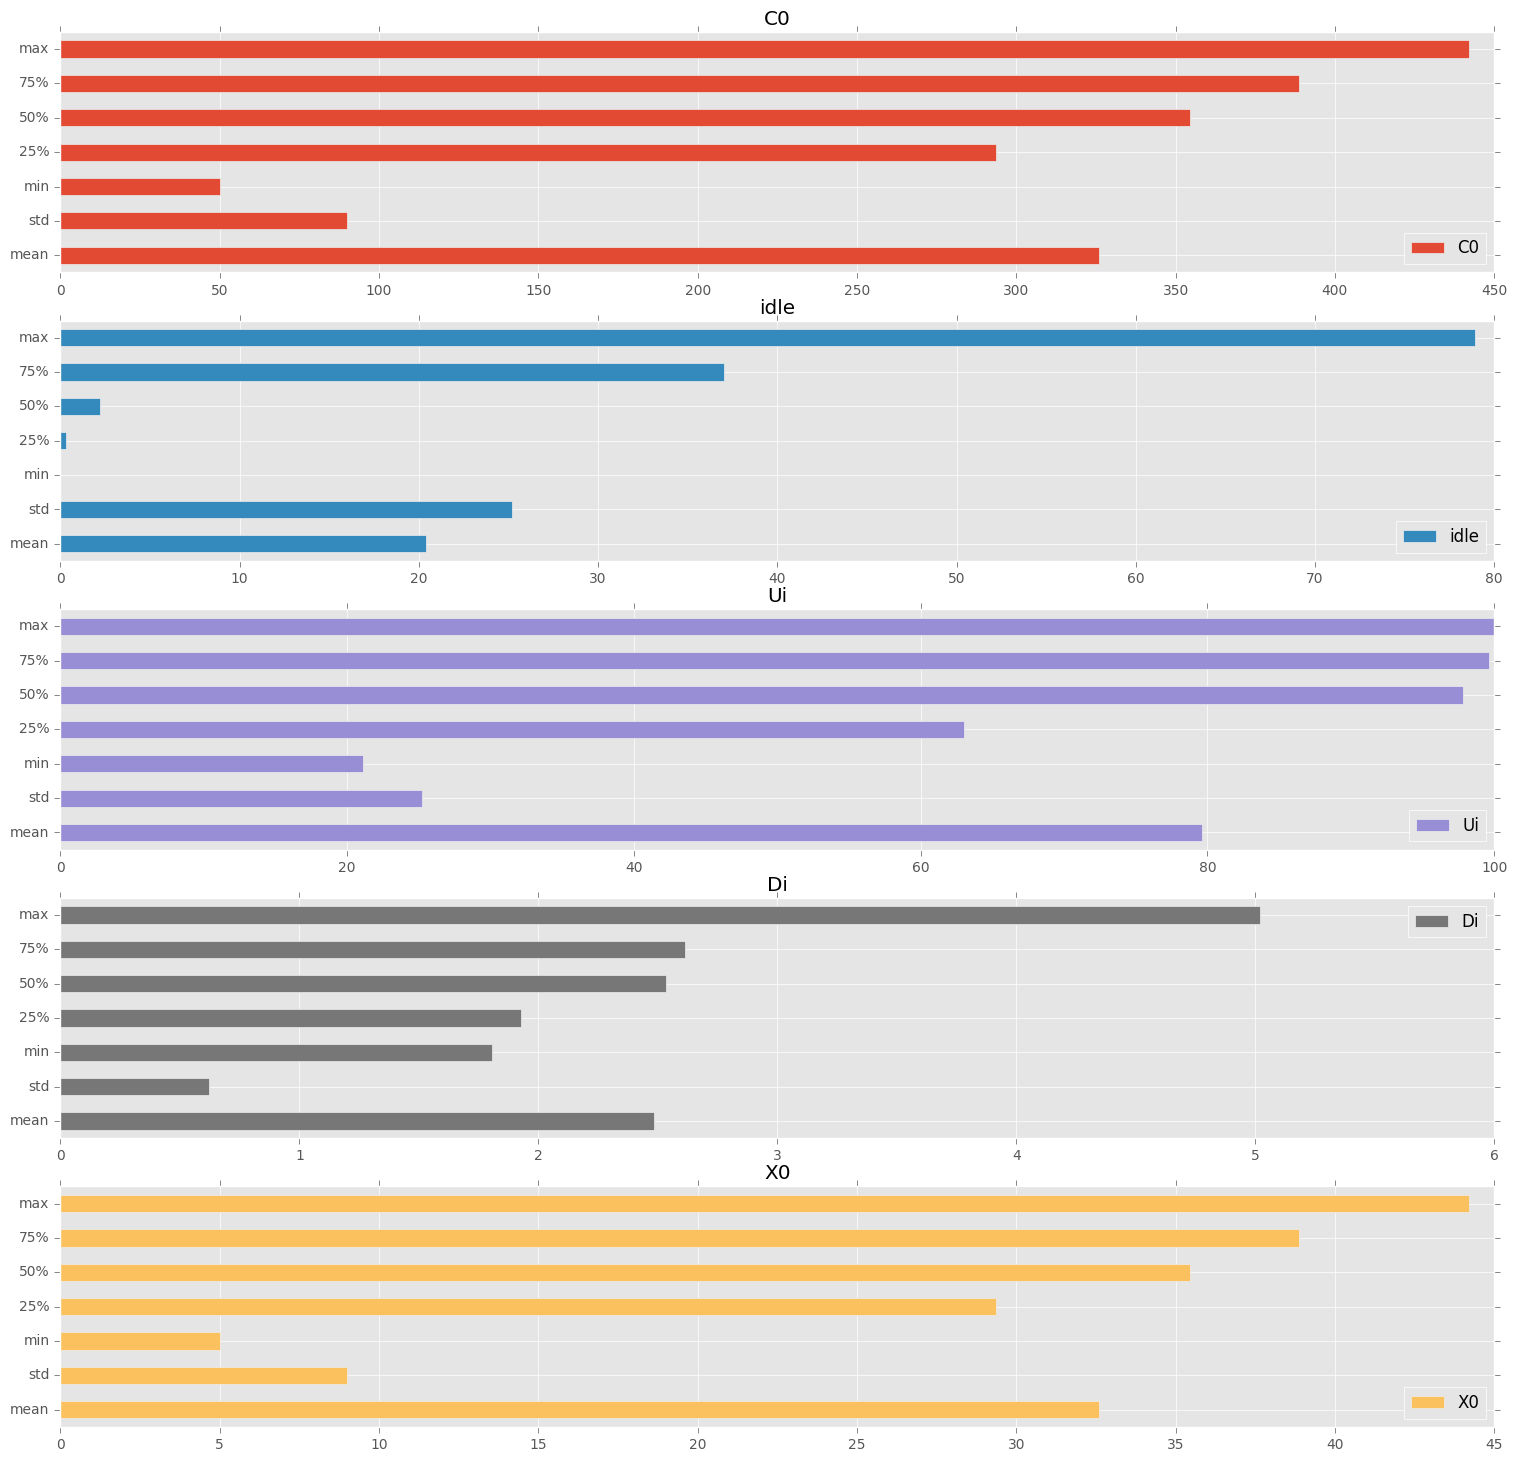

In [36]:
summary.plot(kind='barh', subplots=True, sharex=False)

fig = plt.gcf()
fig.set_size_inches(18.5, 18)

plt.show()